# 🤖 OCR and Text Extraction Workflow

This notebook demonstrates a multi-agent system using Upsonic:

1. **OCR Agent**: Reads text from an ID card image
2. **Extractor Agent**: Extracts specific information (ID Number) from OCR output

**Flow**: Image → OCR → Text Extraction

## 📦 Installation

First, install the required packages:

In [1]:
# Install direct dependencies with exact versions
# (transitive dependencies come automatically)
!pip install -q upsonic==0.71.5 python-dotenv==1.2.1

## 🔑 API Key Setup

Enter your OpenAI API key (required for the agents):

In [2]:
import os
from getpass import getpass

# Set your OpenAI API key
openai_api_key = getpass('Enter your OpenAI API key: ')
os.environ['OPENAI_API_KEY'] = openai_api_key

print("✅ API key configured")

Enter your OpenAI API key: ··········
✅ API key configured


## 📤 Upload Image

Upload an ID card image to analyze (or use the sample image):

Saving vergilevhasi.png to vergilevhasi (1).png
✅ Image uploaded: vergilevhasi (1).png


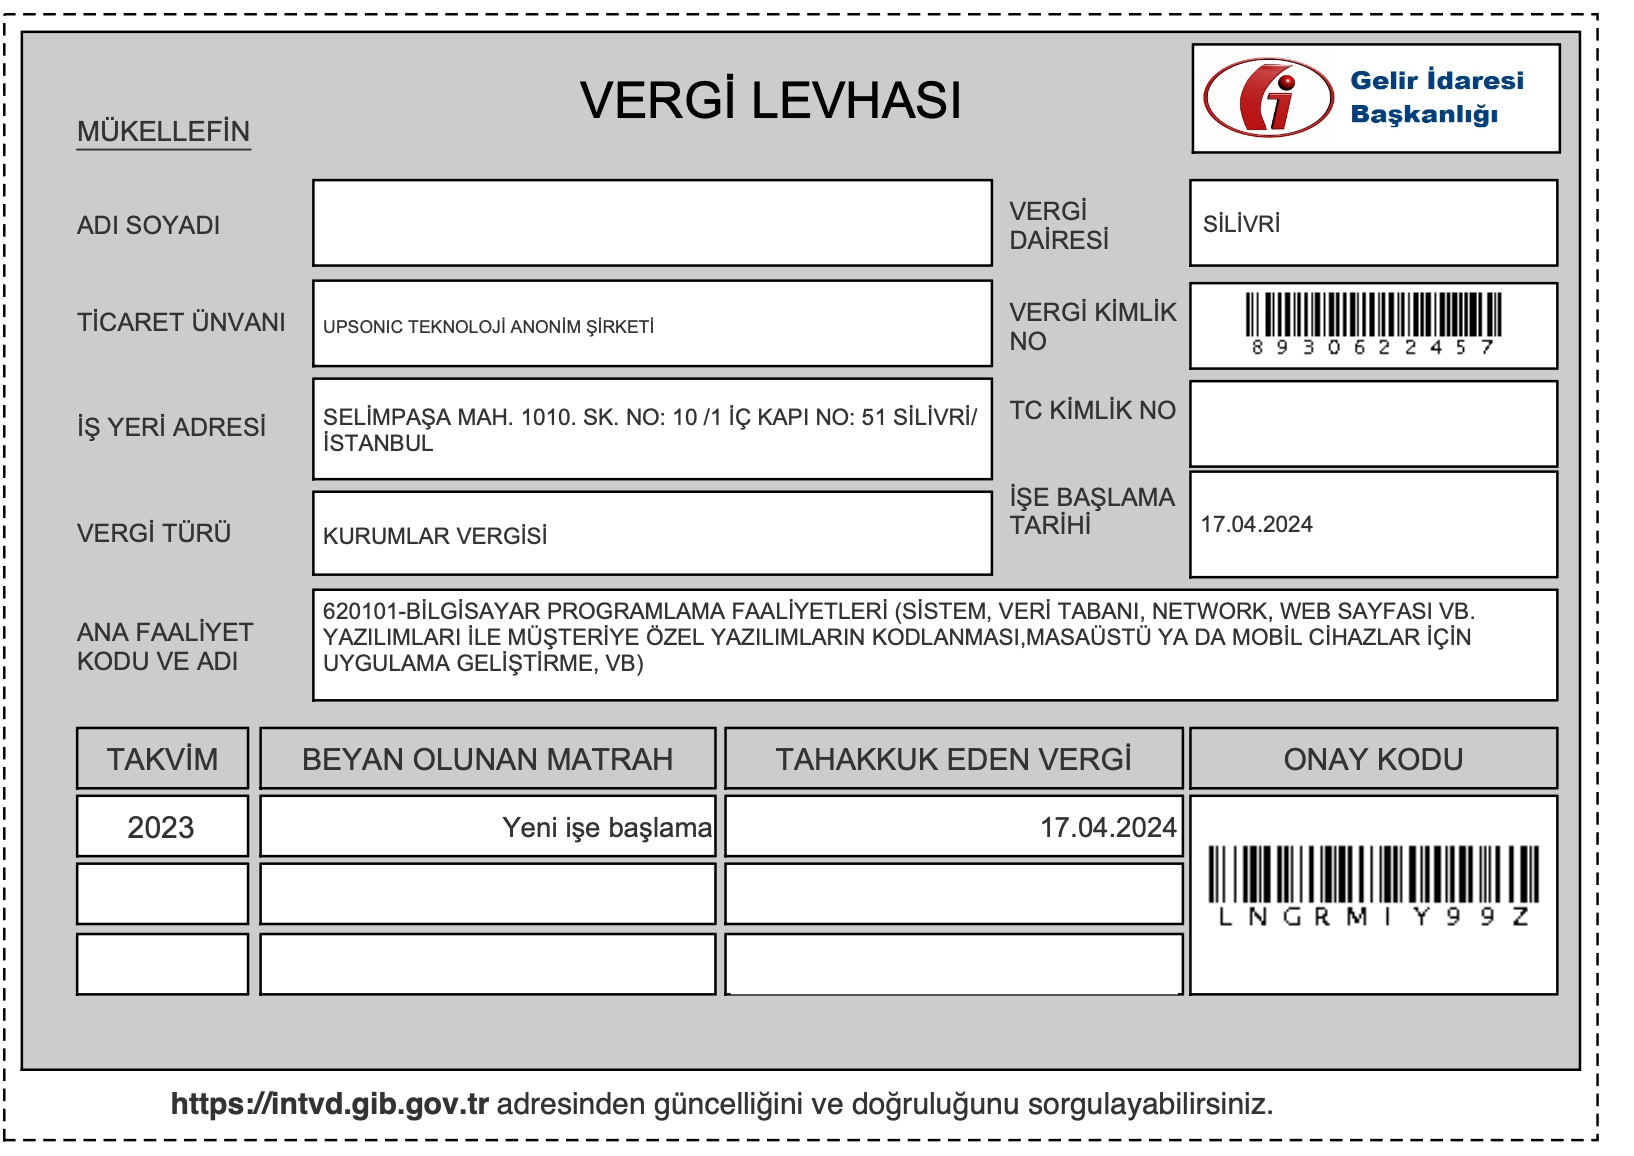

In [3]:
from google.colab import files
from IPython.display import Image, display

# Option 1: Upload your own image
uploaded = files.upload()

# Get the uploaded filename
if uploaded:
    image_path = list(uploaded.keys())[0]
    print(f"✅ Image uploaded: {image_path}")

    # Display the image
    display(Image(filename=image_path, width=400))
else:
    print("⚠️ No image uploaded. Please run this cell again and select an image.")

## 🛠️ Import Libraries

In [4]:
from upsonic import Agent, Task

## 🤖 Define Agents

Create two specialized agents:
- **OCR Agent**: Expert at reading text from images
- **Extractor Agent**: Expert at finding specific information in text

In [5]:
# OCR Agent: Reads text from images
ocr_agent = Agent(
    name="OCR Agent",
    role="Text Recognition Specialist",
    goal="Extract all visible text from images accurately",
    instructions="""You are an expert OCR (Optical Character Recognition) specialist.
    Your job is to carefully read images and extract all visible text with high accuracy.
    You pay attention to every detail and return complete text content.""",
    model="openai/gpt-4o"
)

print("✅ OCR Agent created")

# Extractor Agent: Finds specific information
extractor_agent = Agent(
    name="Extractor Agent",
    role="Information Extraction Specialist",
    goal="Find and extract specific information from text",
    instructions="""You are a data extraction expert. You excel at finding specific
    information in text documents. You are precise and always return exactly
    what is requested, nothing more, nothing less.""",
    model="openai/gpt-4o"
)

print("✅ Extractor Agent created")

✅ OCR Agent created
✅ Extractor Agent created


## 📋 Define Tasks

Create tasks for each agent:
1. **OCR Task**: Read all text from the image
2. **Extraction Task**: Find the ID Number from OCR output

In [6]:
# Task 1: OCR - Read text from image
ocr_task = Task(
    description="""Read the image and extract ALL visible text.

    Return all text you can see in the image, maintaining the original structure.
    Include all fields and their values.""",
    context=[image_path]  # Image file path in context
)

print("✅ OCR Task created")

# Task 2: Extract ID Number
extraction_task = Task(
    description="""From the OCR text provided in the context, find and extract
    ONLY the Company Name  value.

    If not found, return 'NOT_FOUND'.""",
    context=[ocr_task]  # This task depends on ocr_task output
)

print("✅ Extraction Task created")

✅ OCR Task created
✅ Extraction Task created


## ▶️ Execute Workflow

Run the multi-agent workflow:

In [7]:
print("=" * 70)
print("OCR AND TEXT EXTRACTION WORKFLOW")
print("=" * 70)
print()

# ============================================================================
# STEP 1: OCR - Reading image
# ============================================================================
print("\n" + "=" * 70)
print("STEP 1: OCR - Reading image")
print("=" * 70)
ocr_result = ocr_agent.print_do(ocr_task)
print(f"\n📄 OCR Output:")
print(ocr_result)
print(f"\n📊 Characters read: {len(str(ocr_result))}")

# ============================================================================
# STEP 2: EXTRACTION - Finding ID Number
# ============================================================================
print("\n" + "=" * 70)
print("STEP 2: EXTRACTION - Finding ID Number")
print("=" * 70)
extraction_result = extractor_agent.print_do(extraction_task)
print(f"\n🔍 Extracted ID Number: {extraction_result}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("WORKFLOW COMPLETE")
print("=" * 70)
print(f"\n✅ OCR Agent read {len(str(ocr_result))} characters")
print(f"✅ Extractor Agent extracted: {extraction_result}")
print()

INFO:upsonic.sentry.pipeline:Pipeline started: 18 steps


OCR AND TEXT EXTRACTION WORKFLOW


STEP 1: OCR - Reading image


╭───────────────────────── 🤖 Agent Started ─────────────────────────╮
│  Agent Status:             🚀 Started to work                      │
│  Agent Name:               OCR Agent                               │
╰────────────────────────────────────────────────────────────────────╯

INFO:upsonic.sentry:Agent started: OCR Agent


╭─────────────────────────────── 🎯 LLM Result ────────────────────────────────╮
│  🤖 Model:                                                    gpt-4o         │
│                                                                              │
│  📝 Response Format:                                          <class 'str'>  │
│                                                                              │
│  ✨ Result:                                                                  │
│  ```plaintext                                                                │
│  VERGİ LEVHASI                                                               │
│                                                                              │
│  Gelir İdaresi Başkanlığı                                                    │
│                                                                              │
│  MÜKELLEFİN                                                                  │
│                                                                              │
│  ADI SOYADI                                                                  │
│                                                                              │
│  TİCARET ÜNVANI                                                              │
│  UPSONIC TEKNOLOJİ ANONİM ŞİRKETİ                                            │
│                                                                              │
│  İŞ YERİ ADRESİ                                                              │
│  SELİMPAŞA MAH. 1010. SK. NO: 10 /1 İÇ KAPI NO: 51 SİLİVRİ/                  │
│  İSTANBUL                                                                    │
│                                                                              │
│  VERGİ TÜRÜ                                                                  │
│  KURUMLAR VERGİSİ                                                            │
│                                                                              │
│  ANA FAALİYET                                                                │
│  KODU VE ADI                                                                 │
│  620101-BİLGİSAYAR PROGRAMLAMA FAALİYETLERİ (SİSTEM, VERİ                    │
│  TABANI, NETWORK, WEB SAYFASI VB.                                            │
│  YAZILIMLARI İLE MÜŞTERİYE ÖZEL YAZILIMLARIN KODLANMASI,                     │
│  MASAÜSTÜ YA DA MOBİL CİHAZLAR İÇİN                                          │
│  UYGULAMA GELİŞTİRME, VB)                                                    │
│                                                                              │
│  VERGİ DAİRESİ                                                               │
│  SİLİVRİ                                                                     │
│                                                                              │
│  VERGİ KİMLİK NO                                                             │
│  893062457                                                                   │
│                                                                              │
│  TC KİMLİK NO                                                                │
│                                                                              │
│  İŞE BAŞLAMA TARİHİ                                                          │
│  17.04.2024                                                                  │
│                                                                              │
│  TAKVİM                                                                      │
│  2023                                                                        │
│                                                                              │
│  BEYAN OLUNAN MATRAH                                                         │
│  Yeni işe başlama                                                            │
│                                  

INFO:upsonic.sentry:Model call: gpt-4o (9.02s, 0 tools)


╭─────────────────────────── Task Metrics ───────────────────────────╮
│  Price ID:              e212e061-96b4-4714-979c-d9364a4759…        │
│                                                                    │
│  Input Tokens:          1,222                                      │
│  Output Tokens:         378                                        │
│  Total Estimated Cost:  $0.0068                                    │
│  Time Taken:            9.15 seconds                               │
╰────────────────────────────────────────────────────────────────────╯

INFO:upsonic.sentry.pipeline:Pipeline completed: 17/18 steps, 9.162s
INFO:upsonic.sentry.pipeline:Pipeline started: 18 steps



📄 OCR Output:
```plaintext
VERGİ LEVHASI

Gelir İdaresi Başkanlığı

MÜKELLEFİN

ADI SOYADI

TİCARET ÜNVANI
UPSONIC TEKNOLOJİ ANONİM ŞİRKETİ

İŞ YERİ ADRESİ
SELİMPAŞA MAH. 1010. SK. NO: 10 /1 İÇ KAPI NO: 51 SİLİVRİ/
İSTANBUL

VERGİ TÜRÜ
KURUMLAR VERGİSİ

ANA FAALİYET
KODU VE ADI
620101-BİLGİSAYAR PROGRAMLAMA FAALİYETLERİ (SİSTEM, VERİ TABANI, NETWORK, WEB SAYFASI VB.
YAZILIMLARI İLE MÜŞTERİYE ÖZEL YAZILIMLARIN KODLANMASI, MASAÜSTÜ YA DA MOBİL CİHAZLAR İÇİN
UYGULAMA GELİŞTİRME, VB)

VERGİ DAİRESİ
SİLİVRİ

VERGİ KİMLİK NO
893062457

TC KİMLİK NO

İŞE BAŞLAMA TARİHİ
17.04.2024

TAKVİM
2023

BEYAN OLUNAN MATRAH
Yeni işe başlama

TAHAKKUK EDEN VERGİ
17.04.2024

ONAY KODU
L N G R M I Y 9 9 Z

https://intvd.gib.gov.tr adresinden güncelliğini ve doğruluğunu sorgulayabilirsiniz.
```

📊 Characters read: 769

STEP 2: EXTRACTION - Finding ID Number


╭───────────────────────── 🤖 Agent Started ─────────────────────────╮
│  Agent Status:             🚀 Started to work                      │
│  Agent Name:               Extractor Agent                         │
╰────────────────────────────────────────────────────────────────────╯

INFO:upsonic.sentry:Agent started: Extractor Agent


╭─────────────────────────────── 🎯 LLM Result ────────────────────────────────╮
│  🤖 Model:                                            gpt-4o                 │
│                                                                              │
│  📝 Response Format:                                  <class 'str'>          │
│                                                                              │
│  ✨ Result:                                                                  │
│  UPSONIC TEKNOLOJİ ANONİM ŞİRKETİ                                            │
│                                                                              │
│  ⏱️  Execution Time:                                   1.842s                 │
│  📥 Input Tokens:                                     799                    │
│  📤 Output Tokens:                                    18                     │
│  💰 Estimated Cost:                                   ~$0.00218              │
╰──────────────────────────────────────────────────────────────────────────────╯

INFO:upsonic.sentry:Model call: gpt-4o (1.84s, 0 tools)


╭─────────────────────────── Task Metrics ───────────────────────────╮
│  Price ID:              a48abc8b-aa2c-486e-a6e8-1f3a300430…        │
│                                                                    │
│  Input Tokens:          799                                        │
│  Output Tokens:         18                                         │
│  Total Estimated Cost:  $0.0022                                    │
│  Time Taken:            1.86 seconds                               │
╰────────────────────────────────────────────────────────────────────╯

INFO:upsonic.sentry.pipeline:Pipeline completed: 17/18 steps, 1.867s



🔍 Extracted ID Number: UPSONIC TEKNOLOJİ ANONİM ŞİRKETİ

WORKFLOW COMPLETE

✅ OCR Agent read 769 characters
✅ Extractor Agent extracted: UPSONIC TEKNOLOJİ ANONİM ŞİRKETİ



## 📊 Results

The workflow demonstrates:
- **Agent collaboration**: OCR Agent output becomes input for Extractor Agent
- **Task chaining**: Tasks can depend on each other via `context`
- **Specialized roles**: Each agent focuses on what it does best

---

### 🔄 Try It Yourself

1. Upload a different ID card image
2. Modify the extraction task to find different fields (Name, Date of Birth, etc.)
3. Add more agents to the workflow

### 📚 Learn More

- [Upsonic Documentation](https://docs.upsonic.co)
- [GitHub Repository](https://github.com/Upsonic/Upsonic)